In [1]:
import pandas as pd
df=pd.read_csv('/content/task3_cognooo.csv')
df

,ID,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# **Data cleaning**

In [2]:
df.isnull().sum()

,0
ID,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.describe()

,ID,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


# **analysis**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Check for data types in each column
print(df.dtypes)

ID                     int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


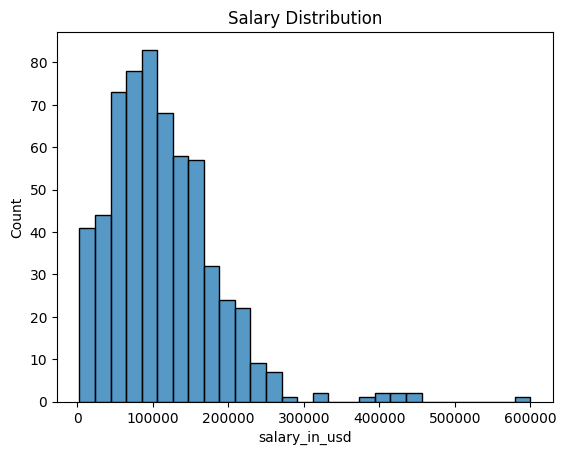

In [11]:
sns.histplot(df['salary_in_usd'])
plt.title('Salary Distribution')
plt.show()

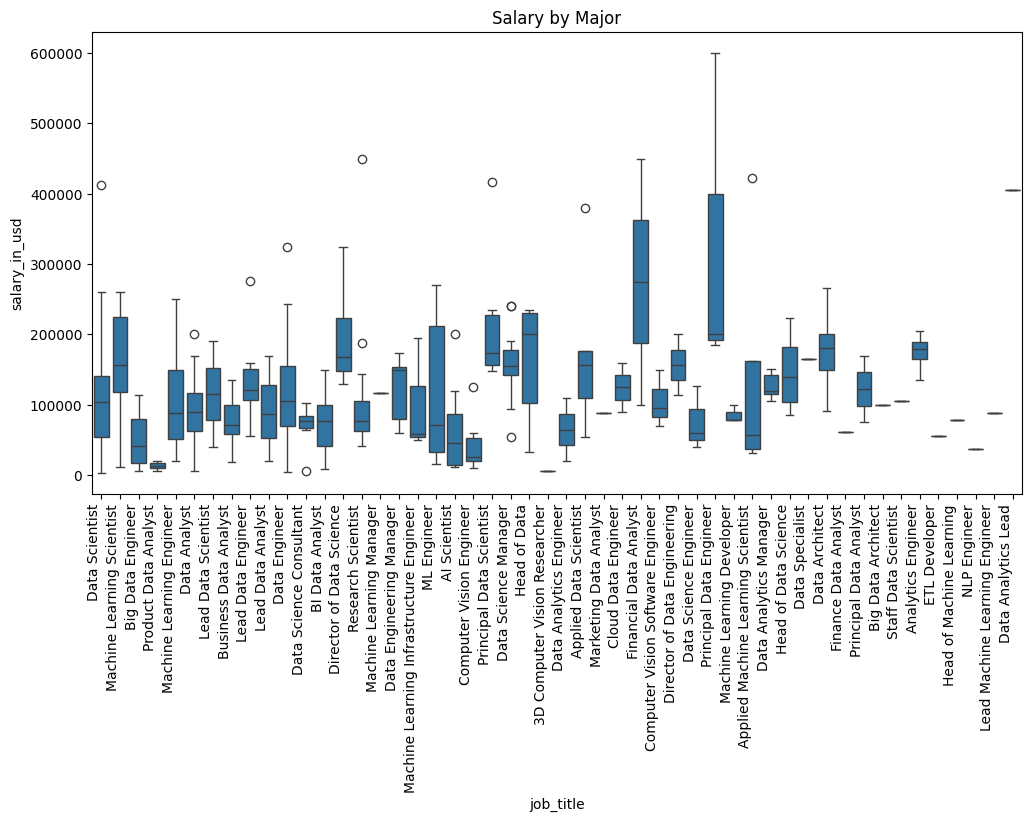

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.title('Salary by Major')
plt.xticks(rotation=90, ha='right')
plt.show()

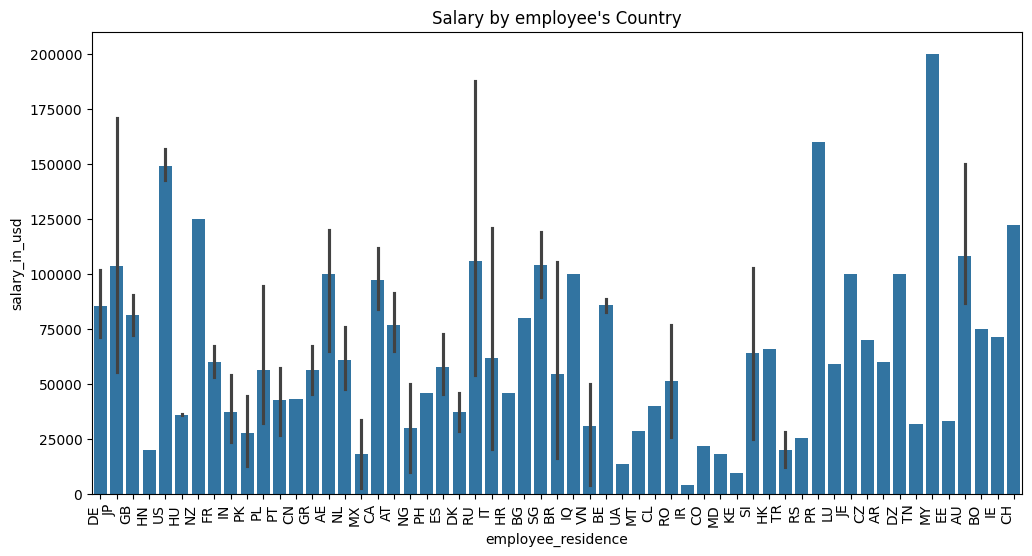

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='employee_residence', y='salary_in_usd', data=df)
plt.title("Salary by employee's Country")
plt.xticks(rotation=90, ha='right')
sns.set_palette("pastel")
plt.show()

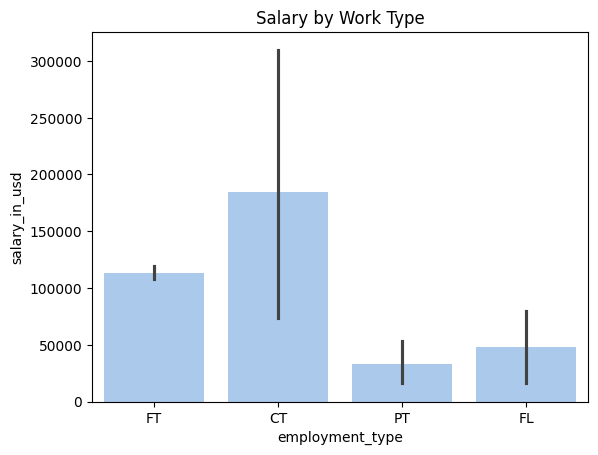

In [14]:
sns.barplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary by Work Type')
plt.show()

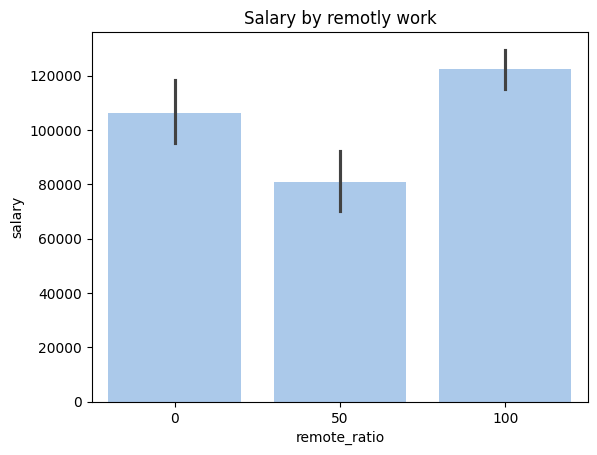

In [15]:
sns.barplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Salary by remotly work')
plt.xlabel('remote_ratio')
plt.ylabel('salary')
plt.show()

In [ ]:
import scipy.stats as stats
remote_salary = df[df['remote_ratio'] == 'Remote']['salary']
in_person_salary = df[df['remote_ratio'] == 'In-Person']['salary']

t_statistic, p_value = stats.ttest_ind(remote_salary, in_person_salary)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: nan
P-value: nan


In [ ]:
# 2. ANOVA for salary differences among multiple majors
major_groups = df.groupby('job_title')['salary_in_usd'].apply(list)
anova_fvalue, anova_pvalue = stats.f_oneway(*major_groups)
print("ANOVA F-value:", anova_fvalue)
print("ANOVA P-value:", anova_pvalue)

ANOVA F-value: 3.8110058535802085
ANOVA P-value: 6.89456329399234e-15


In [ ]:
correlation_coefficient = df['work_year'].corr(df['salary'])
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: -0.08757738389451888


In [ ]:
import statsmodels.api as sm

X = df[['work_year']]
y = df['salary']

X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.676
Date:                Fri, 06 Sep 2024   Prob (F-statistic):             0.0310
Time:                        21:49:59   Log-Likelihood:                -9508.3
No. Observations:                 607   AIC:                         1.902e+04
Df Residuals:                     605   BIC:                         1.903e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.953e+08   1.83e+08      2.164      0.0

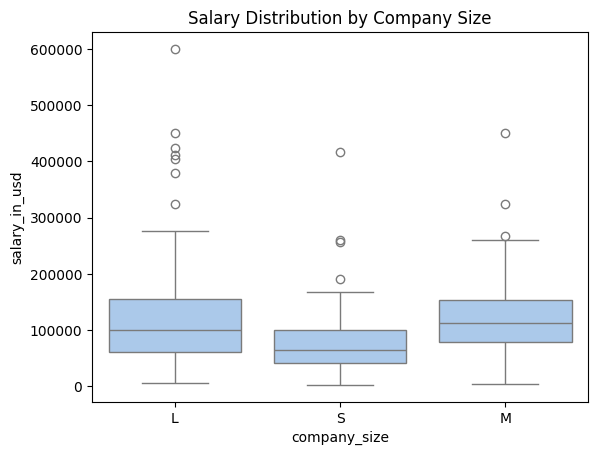

In [16]:
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title("Salary Distribution by Company Size")
plt.show()

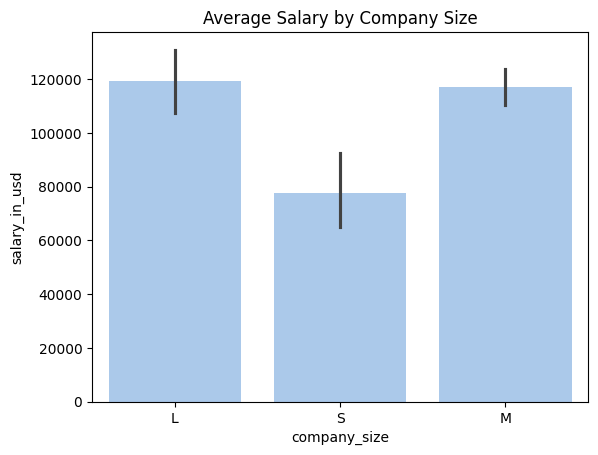

In [17]:
sns.barplot(x='company_size', y='salary_in_usd', data=df)
plt.title("Average Salary by Company Size")
plt.show()

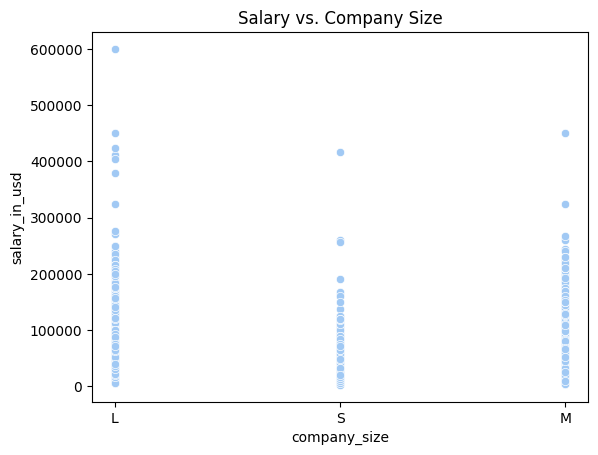

In [18]:
sns.scatterplot(x='company_size', y='salary_in_usd', data=df)
plt.title("Salary vs. Company Size")
plt.show()

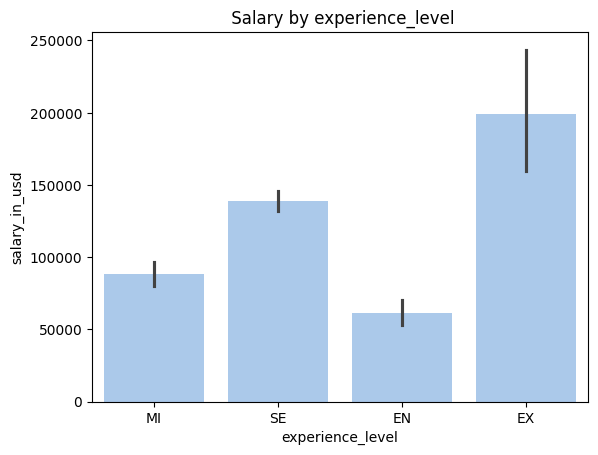

In [19]:
sns.barplot(x='experience_level', y='salary_in_usd', data=df)
plt.title(" Salary by experience_level")
plt.show()

In [20]:
job_salary = df.groupby('job_title')['salary_in_usd'].sum()
print(job_salary)

job_title
3D Computer Vision Researcher                   5409
AI Scientist                                  462949
Analytics Engineer                            700000
Applied Data Scientist                        878275
Applied Machine Learning Scientist            568275
BI Data Analyst                               448531
Big Data Architect                             99703
Big Data Engineer                             415792
Business Data Analyst                         383456
Cloud Data Engineer                           249294
Computer Vision Engineer                      266516
Computer Vision Software Engineer             315746
Data Analyst                                 9010627
Data Analytics Engineer                       259197
Data Analytics Lead                           405000
Data Analytics Manager                        889940
Data Architect                               1956613
Data Engineer                               14879700
Data Engineering Manager            

In [26]:
top_5_jobs = job_salary.nlargest(5)
print(top_5_jobs)

job_title
Data Scientist               15470860
Data Engineer                14879700
Data Analyst                  9010627
Machine Learning Engineer     4300086
Data Architect                1956613
Name: salary_in_usd, dtype: int64


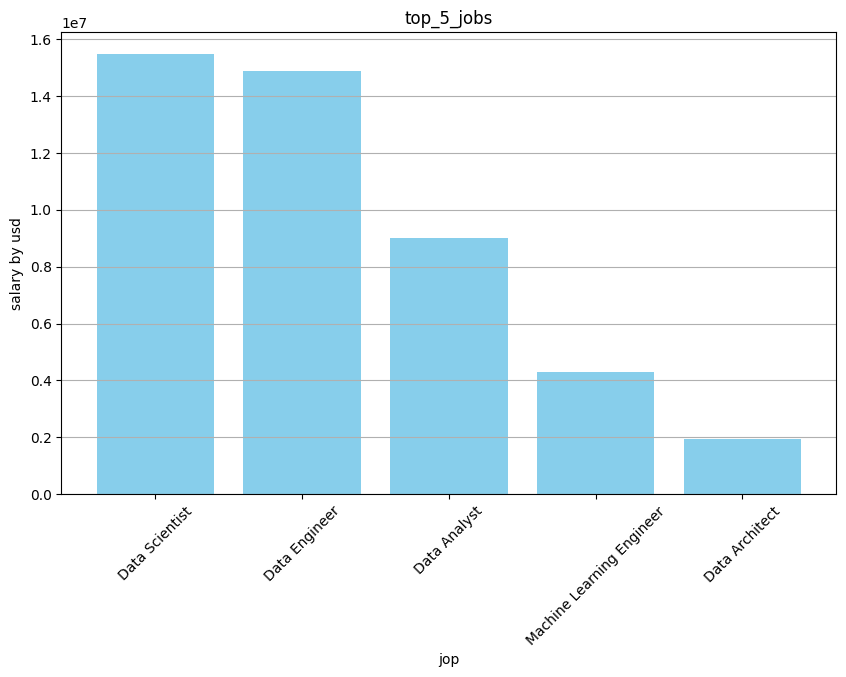

In [28]:
top_5_jobs = pd.Series({'Data Scientist': 15470860,
                       'Data Engineer': 14879700,
                       'Data Analyst': 9010627,
                       'Machine Learning Engineer': 4300086,
                       'Data Architect': 1956613})

plt.figure(figsize=(10, 6))
plt.bar(top_5_jobs.index, top_5_jobs.values, color='skyblue')
plt.title('top_5_jobs')
plt.xlabel('jop')
plt.ylabel('salary by usd')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [21]:
max_job_salary = job_salary.idxmax()
print("job has max salaries is:", max_job_salary)

job has max salaries is: Data Scientist


In [22]:
min_job_salary = job_salary.idxmin()
print("job has min salaries is:", min_job_salary)

job has min salaries is: 3D Computer Vision Researcher


In [23]:
top_5_countries = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(5)
print(top_5_countries)

employee_residence
MY    200000.00000
PR    160000.00000
US    149194.11747
NZ    125000.00000
CH    122346.00000
Name: salary_in_usd, dtype: float64


In [ ]:
highest_salary_country = df.groupby('employee_residence')['salary_in_usd'].mean().idxmax()
print(f"الدولة التي تحصل على أعلى متوسط راتب هي: {highest_salary_country}")

الدولة التي تحصل على أعلى متوسط راتب هي: MY


In [ ]:
lowest_salary_country = df.groupby('employee_residence')['salary_in_usd'].mean().idxmin()
print(f"الدولة التي تحصل على أقل متوسط راتب هي: {lowest_salary_country}")

الدولة التي تحصل على أقل متوسط راتب هي: IR


In [ ]:
remote_work_counts = df.groupby('employee_residence')['remote_ratio'].sum()
print(remote_work_counts)

employee_residence
AE      200
AR      100
AT       50
AU      250
BE      150
BG      100
BO      100
BR      400
CA     2200
CH        0
CL      100
CN        0
CO       50
CZ       50
DE     1400
DK      100
DZ       50
EE      100
ES     1350
FR     1000
GB     2000
GR     1050
HK       50
HN        0
HR      100
HU      100
IE      100
IN     1900
IQ       50
IR      100
IT      200
JE        0
JP      350
KE      100
LU      100
MD        0
MT       50
MX        0
MY      100
NG      200
NL      450
NZ       50
PH      100
PK      400
PL      400
PR       50
PT      400
RO       50
RS      100
RU      250
SG      150
SI      150
TN      100
TR      150
UA      100
US    25650
VN      200
Name: remote_ratio, dtype: int64


In [ ]:
most_remote_country = remote_work_counts.idxmax()
print("Country with highest remote work ratio:", most_remote_country)

Country with highest remote work ratio: US


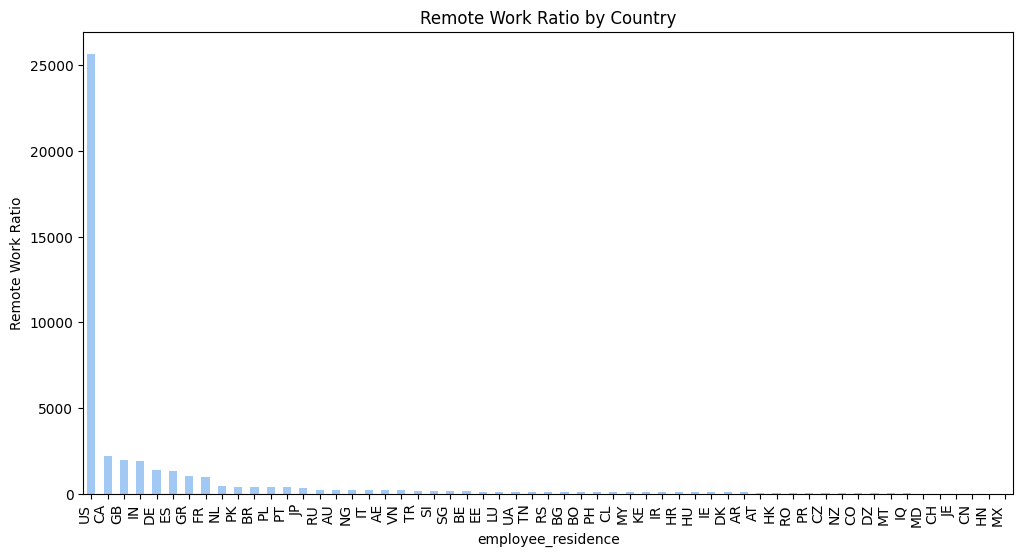

In [ ]:
plt.figure(figsize=(12, 6))
remote_work_counts.sort_values(ascending=False).plot(kind='bar')
plt.title("Remote Work Ratio by Country")
plt.xlabel("employee_residence")
plt.ylabel("Remote Work Ratio")
plt.xticks(rotation=90, ha='right')
plt.show()

1.


